In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn
import plotly.graph_objects as go
import random

In [30]:
from plotly.subplots import make_subplots

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [31]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [32]:
df = pd.read_csv('train_nolog.csv')

In [33]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0,779,1,0,21,tvEpisode,0,False,False,1,['US'],"Action,Adventure,Animation",7.5,1
1,Looping,"(5, 6]",1982,28,0,11,1,0,1,videoGame,0,False,False,1,['XWG'],Action,5.5,0
2,Idealnaya para,"(5, 6]",1992,92,0,38,1,0,24,movie,0,False,False,1,['RU'],Comedy,5.5,1
3,MasterChef Celebrity México,"(5, 6]",2021,53,0,15,22,0,56,tvSeries,0,True,False,1,['MX'],Reality-TV,5.5,0
4,Seutateueob,"(7, 8]",2020,80,1,15718,347,2,47,tvSeries,1,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,456


In [34]:
df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,AwNmExWins,numRegions,ratingMean,ReviewsTotal
count,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000
mean,1992.215636,59.348069,0.410235,1413.813375,11.254066,0.261852,59.784364,0.547441,3.595290,6.672245,9.678493
std,25.923192,39.015371,2.593600,18146.149450,67.679200,2.970572,95.401646,3.565226,5.886415,1.377651,59.385049
min,1878.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000
25%,1978.000000,29.000000,0.000000,15.000000,1.000000,0.000000,17.000000,0.000000,1.000000,5.500000,0.000000
50%,1997.000000,53.000000,0.000000,38.000000,2.000000,0.000000,35.000000,0.000000,1.000000,6.500000,1.000000
75%,2013.000000,90.000000,0.000000,156.000000,6.000000,0.000000,66.000000,0.000000,4.000000,7.500000,3.000000
max,2024.000000,570.000000,145.000000,825934.000000,3504.000000,258.000000,1885.000000,124.000000,69.000000,9.500000,1772.000000


In [35]:
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['canHaveEpisodes']

In [36]:
df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,AwNmExWins,numRegions,ratingMean,ReviewsTotal
0,1995,40,0,779,1,0,21,0,1,7.5,1
1,1982,28,0,11,1,0,1,0,1,5.5,0
2,1992,92,0,38,1,0,24,0,1,5.5,1
3,2021,53,0,15,22,0,56,0,1,5.5,0
4,2020,80,1,15718,347,2,47,1,32,7.5,456


In [37]:
n_attributes = len(df.columns)
print(n_attributes)

11


In [60]:
columns = df.columns

In [61]:
#NORMALIZZAZIONE MINMAX O ZSCORE, COMMMENTARE UNA DELLE DUE RIGHE IN BASE AL TIPO DI NORMALIZZAZIONE CHE SI VUOLE UTILIZZARE
#PER I NOSTRI DATI SEMBRA MEGLIO MIN/MAX

columns = df.columns

scaler = MinMaxScaler()
#scaler = StandardScaler()
train_data = scaler.fit_transform(df)
train_data_df = pd.DataFrame(train_data, columns=columns)
train_data_df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,AwNmExWins,numRegions,ratingMean,ReviewsTotal
count,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000
mean,0.782299,0.104119,0.002829,0.001706,0.003212,0.001015,0.031202,0.004415,0.038166,0.685805,0.005462
std,0.177556,0.068448,0.017887,0.021971,0.019315,0.011514,0.050638,0.028752,0.086565,0.153072,0.033513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684932,0.050877,0.000000,0.000012,0.000285,0.000000,0.008493,0.000000,0.000000,0.555556,0.000000
50%,0.815068,0.092982,0.000000,0.000040,0.000571,0.000000,0.018047,0.000000,0.000000,0.666667,0.000564
75%,0.924658,0.157895,0.000000,0.000183,0.001712,0.000000,0.034501,0.000000,0.044118,0.777778,0.001693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [40]:
# CODICE ITERATIVO PER CALCOLARE L'EPS OTTIMALE PER OGNI K (DA 2 A 51) ATTRAVERSO LA K-DISTANCE
# CO L'EPSILON MEDIO CE FAMO ER BRODO
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(train_data, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=0.5481210962748426
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=0.16121901107100917
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.588037770325355
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=0.19013578300729064
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=0.19117904898392404
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=0.1779497734997112
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=0.18213370508037965
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=0.16430144414495224
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=0.19936057224376982
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=0.3348215586081307
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=0.20778152826544977
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=0.21642285766673636
Epsilon ottimale secondo il metodo del gomito: k=14 e

In [52]:
from sklearn.model_selection import ParameterGrid

# Definisci i parametri per la grid search
param_grid = {
    'eps': np.arange(0.1, 0.15, 0.01),
    'min_samples': np.arange(2, 18, 3)
}

# Inizializza una lista per memorizzare i risultati
results = []

# Esegui la grid search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], metric='euclidean')
    dbscan.fit(train_data)
    
    # Calcola il numero di cluster (escludendo il rumore)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    
    # Calcola il silhouette score (escludendo i punti rumorosi)
    if n_clusters > 1:
        silhouette = silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])
    else:
        silhouette = -1  # Silhouette score non definito per un singolo cluster
    
    # Memorizza i risultati
    results.append({
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'n_clusters': n_clusters,
        'silhouette': silhouette
    })

# Converti i risultati in un DataFrame per una visualizzazione più semplice
results_df = pd.DataFrame(results)
results_df

,eps,min_samples,n_clusters,silhouette
0,0.10,2,50,0.001774
1,0.10,5,16,0.045426
2,0.10,8,10,0.055897
3,0.10,11,10,0.056949
4,0.10,14,11,0.042677
5,0.10,17,10,0.058449
6,0.11,2,39,0.005389
7,0.11,5,15,0.045463
8,0.11,8,10,0.055122
9,0.11,11,10,0.055853


epsilon = 0.3348215586081307


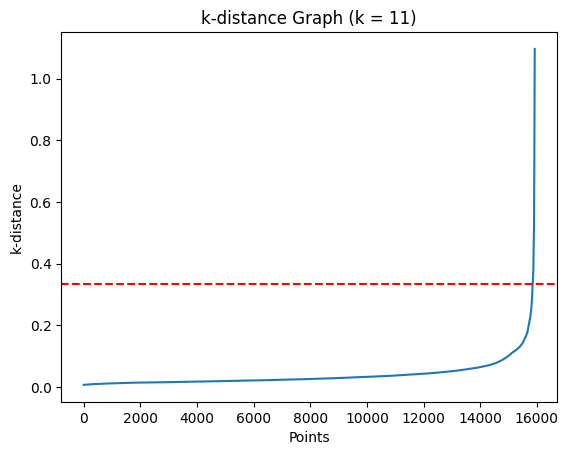

In [ ]:
# CODICE PER CALCOLARE LA K DISTANCE DI UN K E IL SUO RELATIVO EPS OTIIMALE SECONDO IL METODO DEL GOMITO
distances = create_kdistance_graph(train_data, n_attributes)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print("epsilon = {}".format(epsilon))



# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 11)')
plt.show()

In [54]:
# IL MINIMO DEI SAMPLES DEVE ESSERE K+1, E DI SOLITO SI SCEGLIE UN MINIMO CHE è UGUALE AL NUMERO DI ATTRIBUTI(VARIABILI) PRESENTI NEL DATASET.
# CODICE PER CALCOLARE IL density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.13, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(250), np.int64(0): np.int64(15668), np.int64(1): np.int64(7), np.int64(2): np.int64(0)}
silhouette 0.49317698337417626


0.18 buono k=12

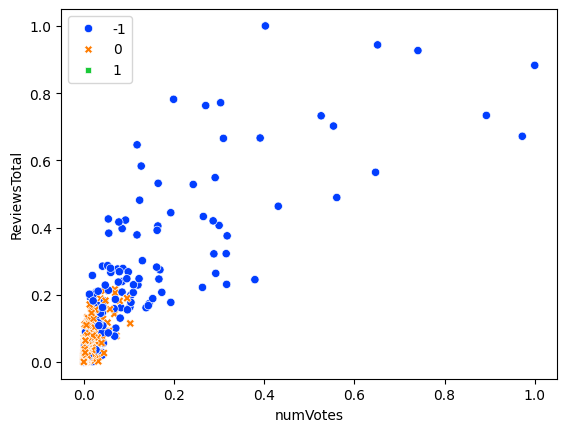

In [62]:
sns.scatterplot(data=train_data_df, 
                x="numVotes", 
                y="ReviewsTotal", 
                hue=dbscan.labels_, 
                style=dbscan.labels_,
                palette="bright")
plt.show()

In [ ]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [ ]:
# CODICE ITERATIVO PER CALCOLARE L'EPS OTTIMALE PER OGNI K (DA 2 A 51) ATTRAVERSO LA K-DISTANCE
# CO L'EPSILON MEDIO CE FAMO ER BRODO
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(train_data, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=0.5481210962748426
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=0.16121901107100917
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.588037770325355
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=0.19013578300729064
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=0.19117904898392404
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=0.1779497734997112
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=0.18213370508037965
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=0.16430144414495224
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=0.19936057224376982
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=0.3348215586081307
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=0.20778152826544977
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=0.21642285766673636
Epsilon ottimale secondo il metodo del gomito: k=14 e

In [ ]:
from sklearn.model_selection import ParameterGrid

# Definisci i parametri per la grid search
param_grid = {
    'eps': np.arange(0.1, 0.15, 0.01),
    'min_samples': np.arange(2, 18, 3)
}

# Inizializza una lista per memorizzare i risultati
results = []

# Esegui la grid search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], metric='euclidean')
    dbscan.fit(train_data)
    
    # Calcola il numero di cluster (escludendo il rumore)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    
    # Calcola il silhouette score (escludendo i punti rumorosi)
    if n_clusters > 1:
        silhouette = silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])
    else:
        silhouette = -1  # Silhouette score non definito per un singolo cluster
    
    # Memorizza i risultati
    results.append({
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'n_clusters': n_clusters,
        'silhouette': silhouette
    })

# Converti i risultati in un DataFrame per una visualizzazione più semplice
results_df = pd.DataFrame(results)
results_df

,eps,min_samples,n_clusters,silhouette
0,0.10,2,50,0.001774
1,0.10,5,16,0.045426
2,0.10,8,10,0.055897
3,0.10,11,10,0.056949
4,0.10,14,11,0.042677
5,0.10,17,10,0.058449
6,0.11,2,39,0.005389
7,0.11,5,15,0.045463
8,0.11,8,10,0.055122
9,0.11,11,10,0.055853


epsilon = 0.3348215586081307


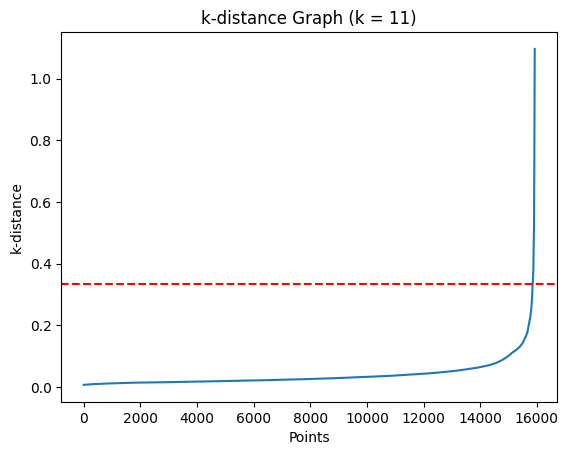

In [ ]:
# CODICE PER CALCOLARE LA K DISTANCE DI UN K E IL SUO RELATIVO EPS OTIIMALE SECONDO IL METODO DEL GOMITO
distances = create_kdistance_graph(train_data, n_attributes)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print("epsilon = {}".format(epsilon))



# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 11)')
plt.show()

In [ ]:
# IL MINIMO DEI SAMPLES DEVE ESSERE K+1, E DI SOLITO SI SCEGLIE UN MINIMO CHE è UGUALE AL NUMERO DI ATTRIBUTI(VARIABILI) PRESENTI NEL DATASET.
# CODICE PER CALCOLARE IL density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.13, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(250), np.int64(0): np.int64(15668), np.int64(1): np.int64(7), np.int64(2): np.int64(0)}
silhouette 0.49317698337417626


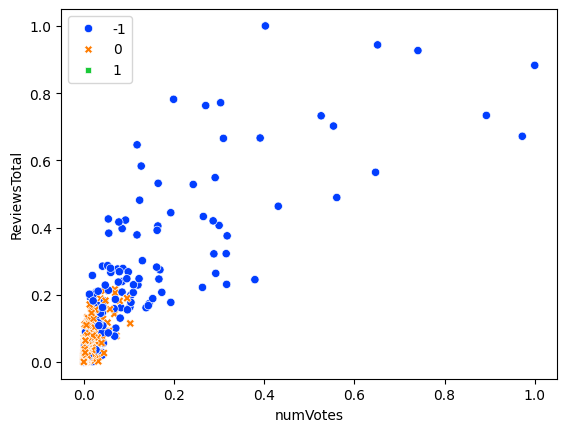

In [ ]:
sns.scatterplot(data=train_data_df, 
                x="numVotes", 
                y="ReviewsTotal", 
                hue=dbscan.labels_, 
                style=dbscan.labels_,
                palette="bright")
plt.show()

-----------------
#### CUT DATASET

In [75]:
df_cut = df[['numVotes', 'numRegions', 'ReviewsTotal']]

In [76]:
df_cut.head()

,numVotes,numRegions,ReviewsTotal
0,779,1,1
1,11,1,0
2,38,1,1
3,15,1,0
4,15718,32,456


In [77]:
columns = df_cut.columns

scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_cut)
train_data_df = pd.DataFrame(train_data, columns=columns)
train_data_df.describe()

,numVotes,numRegions,ReviewsTotal
count,15925.000000,15925.000000,15925.000000
mean,0.001706,0.038166,0.005462
std,0.021971,0.086565,0.033513
min,0.000000,0.000000,0.000000
25%,0.000012,0.000000,0.000000
50%,0.000040,0.000000,0.000564
75%,0.000183,0.044118,0.001693
max,1.000000,1.000000,1.000000


In [78]:
n_attributes = len(df_cut.columns)
print(n_attributes)

3


In [79]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [80]:
# CODICE ITERATIVO PER CALCOLARE L'EPS OTTIMALE PER OGNI K (DA 2 A 51) ATTRAVERSO LA K-DISTANCE
# CO L'EPSILON MEDIO CE FAMO ER BRODO
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(train_data, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=0.2524636107688177
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=0.21518239847190887
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.02744159263481066
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=0.01932695094126385
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=0.03990225647763981
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=0.02343556320064071
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=0.027895073559019427
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=0.05393868384874873
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=0.06457267701792319
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=0.03215020431209587
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=0.030905033480178336
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=0.10569037785562838
Epsilon ottimale secondo il metodo del gomito: 

In [81]:
from sklearn.model_selection import ParameterGrid

# Definisci i parametri per la grid search
param_grid = {
    'eps': np.arange(0.1, 0.15, 0.01),
    'min_samples': np.arange(2, 18, 3)
}

# Inizializza una lista per memorizzare i risultati
results = []

# Esegui la grid search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], metric='euclidean')
    dbscan.fit(train_data)
    
    # Calcola il numero di cluster (escludendo il rumore)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    
    # Calcola il silhouette score (escludendo i punti rumorosi)
    if n_clusters > 1:
        silhouette = silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])
    else:
        silhouette = -1  # Silhouette score non definito per un singolo cluster
    
    # Memorizza i risultati
    results.append({
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'n_clusters': n_clusters,
        'silhouette': silhouette
    })

# Converti i risultati in un DataFrame per una visualizzazione più semplice
results_df = pd.DataFrame(results)
results_df

,eps,min_samples,n_clusters,silhouette
0,0.10,2,6,0.821556
1,0.10,5,3,0.902187
2,0.10,8,1,-1.000000
3,0.10,11,1,-1.000000
4,0.10,14,1,-1.000000
5,0.10,17,1,-1.000000
6,0.11,2,5,0.927163
7,0.11,5,1,-1.000000
8,0.11,8,1,-1.000000
9,0.11,11,1,-1.000000


epsilon = 0.21518239847190887


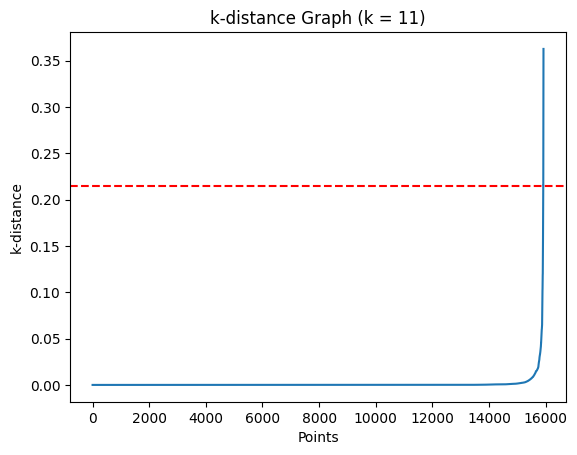

In [82]:
# CODICE PER CALCOLARE LA K DISTANCE DI UN K E IL SUO RELATIVO EPS OTIIMALE SECONDO IL METODO DEL GOMITO
distances = create_kdistance_graph(train_data, n_attributes)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print("epsilon = {}".format(epsilon))



# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 11)')
plt.show()

In [86]:
# IL MINIMO DEI SAMPLES DEVE ESSERE K+1, E DI SOLITO SI SCEGLIE UN MINIMO CHE è UGUALE AL NUMERO DI ATTRIBUTI(VARIABILI) PRESENTI NEL DATASET.
# CODICE PER CALCOLARE IL density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.04, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(88), np.int64(0): np.int64(15829), np.int64(1): np.int64(8), np.int64(2): np.int64(0)}
silhouette 0.8940525786622265


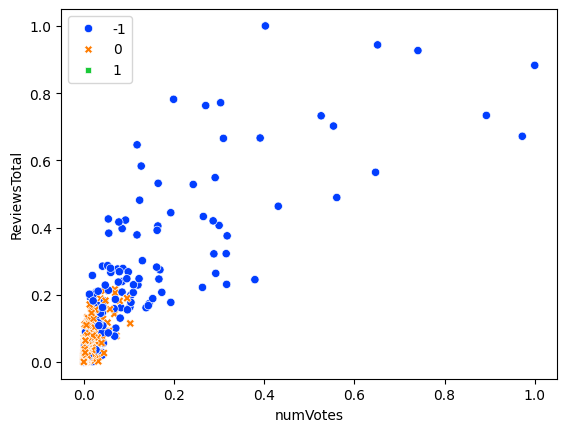

In [ ]:
sns.scatterplot(data=train_data_df, 
                x="numVotes", 
                y="ReviewsTotal", 
                hue=dbscan.labels_, 
                style=dbscan.labels_,
                palette="bright")
plt.show()